In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

file_path = 'AirQualityUCI.xlsx'

# Load the Excel file into a DataFrame
data = pd.read_excel(file_path)

# Display the DataFrame
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [2]:
data.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [3]:
timestamp_cols = data.select_dtypes(include=['datetime64']).columns
for col in timestamp_cols:
    data[col] = pd.to_numeric(data[col])
    
object_cols = data.select_dtypes(include=['object']).columns
data = data.drop(object_cols, axis=1)
    
data.head()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1078876800000000000,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,1078876800000000000,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,1078876800000000000,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,1078876800000000000,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1078876800000000000,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [4]:
data.dtypes

Date               int64
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)           int64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [5]:
# Grandient descent for "T" column

# Function to compute the cost (mean squared error) given features X, targets y, weights w, and bias b
def compute_cost(X, y, w, b):
    m = X.shape[0]  # Number of training examples
    cost = np.sum((np.dot(X, w) + b - y) ** 2)  # Compute the squared error for each example and sum them
    return cost / (2 * m)  # Return the mean squared error

# Function to compute the gradient of the cost function with respect to weights w and bias b
def compute_gradient(X, y, w, b):
    m = X.shape[0]  # Number of training examples
    dw = np.dot(X.T, (np.dot(X, w) + b - y)) / m  # Compute the gradient of the cost with respect to weights
    db = np.sum(np.dot(X, w) + b - y) / m  # Compute the gradient of the cost with respect to bias
    return dw, db

# Function to perform gradient descent to optimize weights w and bias b
def gradient_descent(X, y, w_init, b_init, alpha, num_iters):
    w = copy.deepcopy(w_init)  # Initialize weights
    b = b_init  # Initialize bias
    m = X.shape[0]  # Number of training examples
    J_history = []  # List to store the cost at each iteration
    for i in range(num_iters):
        dw, db = compute_gradient(X, y, w, b)  # Compute the gradient of the cost
        w -= alpha * dw  # Update weights
        b -= alpha * db  # Update bias
        cost = compute_cost(X, y, w, b)  # Compute the cost
        J_history.append(cost)  # Store the cost in the history list
        if i % math.ceil(num_iters / 10) == 0:  # Print cost every 10% of iterations
            print(f"Iteration {i:4}: Cost {cost:0.2e}")
    return w, b, J_history  # Return optimized weights, bias, and cost history

# Assuming your data is loaded and preprocessed
# Split data into training and testing sets (75% training, 25% testing)
split_index = int(0.75 * len(data))  # Split index for training and testing data
X = np.array(data.iloc[:, 0:11])  # Extract features (first 11 columns)
y = np.array(data.iloc[:, 11])    # Extract targets (12th column)

X_train, X_test = X[:split_index], X[split_index:]  # Split features into training and testing sets
y_train, y_test = y[:split_index], y[split_index:]  # Split targets into training and testing sets

# Feature Scaling
# Compute standard deviation for scaling
std_X_train = np.std(X_train, axis=0)
std_X_test = np.std(X_test, axis=0)
# Avoid division by zero for zero standard deviations
std_X_train[std_X_train == 0] = 1
std_X_test[std_X_test == 0] = 1
# Scale features
X_train_scaled = (X_train - np.mean(X_train, axis=0)) / std_X_train
X_test_scaled = (X_test - np.mean(X_test, axis=0)) / std_X_test
# Handle NaN values
X_train_scaled = np.nan_to_num(X_train_scaled)
X_test_scaled = np.nan_to_num(X_test_scaled)

# Initialize parameters
w_init = np.zeros(X_train_scaled.shape[1])  # Initialize weights
b_init = 0  # Initialize bias

# Gradient Descent settings
iterations = 5000  # Number of iterations
learning_rate = 0.0001  # Learning rate

# Run Gradient Descent
w_final, b_final, J_hist = gradient_descent(X_train_scaled, y_train, w_init, b_init, learning_rate, iterations)

# Test the model on the testing set
y_pred = np.dot(X_test_scaled, w_final) + b_final

# Calculate test performance (Mean Squared Error)
mse = np.mean((y_test - y_pred) ** 2)
print("Test Mean Squared Error: ",mse)

# Print output in desired format
print("(w,b) found by gradient descent:")
print("w:", np.array_str(w_final, precision=4, suppress_small=True))  # Print weights
print("b:", b_final)  # Print bias


Iteration    0: Cost 8.94e+02
Iteration  500: Cost 6.87e+02
Iteration 1000: Cost 5.43e+02
Iteration 1500: Cost 4.40e+02
Iteration 2000: Cost 3.65e+02
Iteration 2500: Cost 3.09e+02
Iteration 3000: Cost 2.67e+02
Iteration 3500: Cost 2.34e+02
Iteration 4000: Cost 2.08e+02
Iteration 4500: Cost 1.87e+02
Test Mean Squared Error:  500.30589767504966
(w,b) found by gradient descent:
w: [-0.3968 -0.296   5.6874 -1.4494 10.048   4.6672 -2.4493  7.409  -0.6313
  6.5499  2.6077]
b: 5.440078415138028


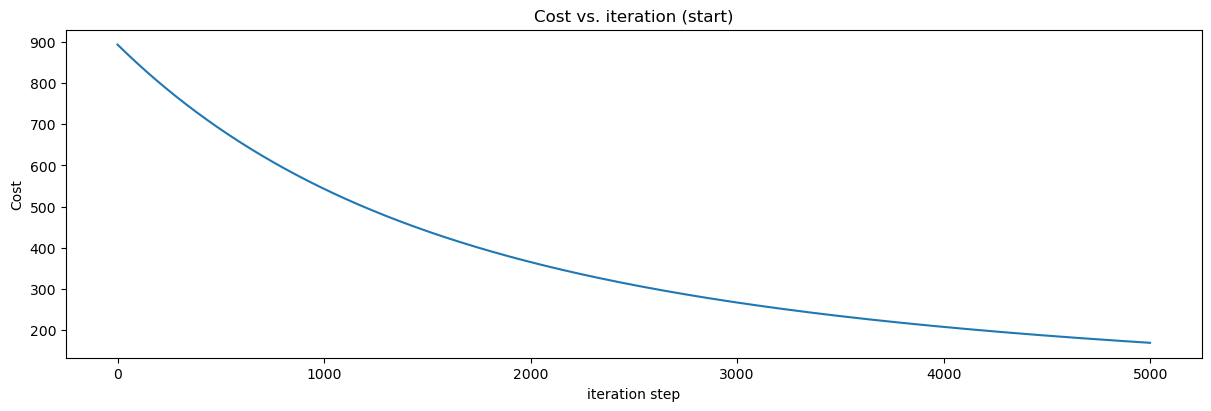

In [6]:
# Assuming J_hist contains the history of cost values during gradient descent

# plot cost versus iteration
fig, ax1 = plt.subplots(1, 1, constrained_layout=True, figsize=(12,4))
ax1.plot(range(iterations), J_hist[:iterations])
ax1.set_title("Cost vs. iteration (start)")
ax1.set_ylabel('Cost')
ax1.set_xlabel('iteration step')
plt.show()


In [7]:
# Grandient descent for "RH" column

def compute_cost(X, y, w, b):
    m = X.shape[0] 
    cost = np.sum((np.dot(X, w) + b - y) ** 2)
    return cost / (2 * m)

def compute_gradient(X, y, w, b):
    m = X.shape[0]
    dw = np.dot(X.T, (np.dot(X, w) + b - y)) / m
    db = np.sum(np.dot(X, w) + b - y) / m
    return dw, db

def gradient_descent(X, y, w_init, b_init, alpha, num_iters):
    w = copy.deepcopy(w_init)
    b = b_init
    m = X.shape[0]
    J_history = []
    for i in range(num_iters):
        dw, db = compute_gradient(X, y, w, b)
        w -= alpha * dw
        b -= alpha * db
        cost = compute_cost(X, y, w, b)
        J_history.append(cost)
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {cost:0.2e}")
    return w, b, J_history

# Assuming your data is loaded and preprocessed, and you have defined functions compute_cost and compute_gradient as provided

# Split data into training and testing sets (75% training, 25% testing)
split_index = int(0.75 * len(data))  # Assuming 'data' contains your dataset
X = np.array(data.iloc[:, 0:11])      # Assuming the first 11 columns are features
y = np.array(data.iloc[:, 12])     # Assuming the 13th column is the target

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Feature Scaling
# Feature Scaling with check for zero standard deviation and NaN values
std_X_train = np.std(X_train, axis=0)
std_X_test = np.std(X_test, axis=0)

std_X_train[std_X_train == 0] = 1  # Replace zero standard deviations with 1 to avoid division by zero
std_X_test[std_X_test == 0] = 1

X_train_scaled = (X_train - np.mean(X_train, axis=0)) / std_X_train
X_test_scaled = (X_test - np.mean(X_test, axis=0)) / std_X_test

# Handle NaN values if present
X_train_scaled = np.nan_to_num(X_train_scaled)
X_test_scaled = np.nan_to_num(X_test_scaled)


# Initialize parameters
w_init = np.zeros(X_train_scaled.shape[1])
b_init = 0

# Gradient Descent settings
iterations = 5000
learning_rate = 0.00001

# Run Gradient Descent
w_final, b_final, J_hist = gradient_descent(X_train_scaled, y_train, w_init, b_init, learning_rate, iterations)

# Test the model on the testing set
y_pred = np.dot(X_test_scaled, w_final) + b_final

# Calculate test performance (Mean Squared Error)
mse = np.mean((y_test - y_pred) ** 2)
print("Test Mean Squared Error: ",mse)

#print(f"(w,b) found by gradient descent: ({w_final: 10.4f}, {b_final: 10.4f})")
# w_final_mean = np.mean(w_final)
# b_final_mean = np.mean(b_final)
# print(f"(w,b) found by gradient descent: ({w_final_mean: 10.4f}, {b_final_mean: 10.4f})")

print("(w,b) found by gradient descent:")
print("w:", np.array_str(w_final, precision=4, suppress_small=True))
print("b:", b_final)


Iteration    0: Cost 1.92e+03
Iteration  500: Cost 1.89e+03
Iteration 1000: Cost 1.85e+03
Iteration 1500: Cost 1.82e+03
Iteration 2000: Cost 1.78e+03
Iteration 2500: Cost 1.75e+03
Iteration 3000: Cost 1.72e+03
Iteration 3500: Cost 1.69e+03
Iteration 4000: Cost 1.66e+03
Iteration 4500: Cost 1.63e+03
Test Mean Squared Error:  4298.657200221921
(w,b) found by gradient descent:
w: [ 0.0956 -0.091   1.4932 -0.0051  1.9805  1.1416 -0.1148  1.2363 -0.1802
  1.3989  1.0335]
b: 1.9584799192851259


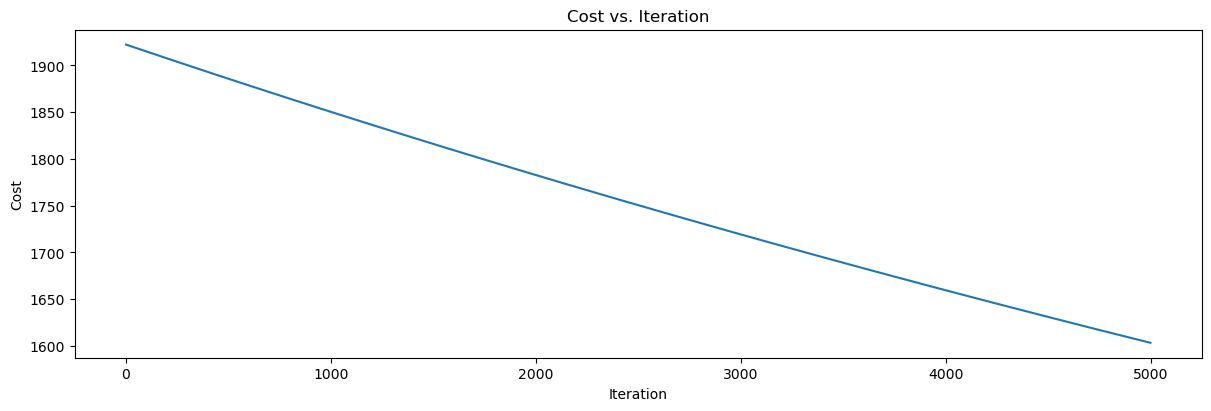

In [8]:
# Plot cost versus iteration
fig, ax1 = plt.subplots(1, 1, constrained_layout=True, figsize=(12,4))
ax1.plot(range(iterations), J_hist)
ax1.set_title("Cost vs. Iteration")
ax1.set_ylabel('Cost')
ax1.set_xlabel('Iteration')
plt.show()


In [9]:
# Grandient descent for "AH" column

def compute_cost(X, y, w, b):
    m = X.shape[0] 
    cost = np.sum((np.dot(X, w) + b - y) ** 2)
    return cost / (2 * m)

def compute_gradient(X, y, w, b):
    m = X.shape[0]
    dw = np.dot(X.T, (np.dot(X, w) + b - y)) / m
    db = np.sum(np.dot(X, w) + b - y) / m
    return dw, db

def gradient_descent(X, y, w_init, b_init, alpha, num_iters):
    w = copy.deepcopy(w_init)
    b = b_init
    m = X.shape[0]
    J_history = []
    for i in range(num_iters):
        dw, db = compute_gradient(X, y, w, b)
        w -= alpha * dw
        b -= alpha * db
        cost = compute_cost(X, y, w, b)
        J_history.append(cost)
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {cost:0.2e}")
    return w, b, J_history

# Assuming your data is loaded and preprocessed, and you have defined functions compute_cost and compute_gradient as provided

# Split data into training and testing sets (75% training, 25% testing)
split_index = int(0.75 * len(data))  # Assuming 'data' contains your dataset
X = np.array(data.iloc[:, 0:11])      # Assuming the first 11 columns are features
y = np.array(data.iloc[:, -1])     # Assuming the 13th column is the target

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Feature Scaling
# Feature Scaling with check for zero standard deviation and NaN values
std_X_train = np.std(X_train, axis=0)
std_X_test = np.std(X_test, axis=0)

std_X_train[std_X_train == 0] = 1  # Replace zero standard deviations with 1 to avoid division by zero
std_X_test[std_X_test == 0] = 1

X_train_scaled = (X_train - np.mean(X_train, axis=0)) / std_X_train
X_test_scaled = (X_test - np.mean(X_test, axis=0)) / std_X_test

# Handle NaN values if present
X_train_scaled = np.nan_to_num(X_train_scaled)
X_test_scaled = np.nan_to_num(X_test_scaled)


# Initialize parameters
w_init = np.zeros(X_train_scaled.shape[1])
b_init = 0

# Gradient Descent settings
iterations = 5000
learning_rate = 0.0001

# Run Gradient Descent
w_final, b_final, J_hist = gradient_descent(X_train_scaled, y_train, w_init, b_init, learning_rate, iterations)

# Test the model on the testing set
y_pred = np.dot(X_test_scaled, w_final) + b_final

# Calculate test performance (Mean Squared Error)
mse = np.mean((y_test - y_pred) ** 2)
print("Test Mean Squared Error: ",mse)

#print(f"(w,b) found by gradient descent: ({w_final: 10.4f}, {b_final: 10.4f})")
# w_final_mean = np.mean(w_final)
# b_final_mean = np.mean(b_final)
# print(f"(w,b) found by gradient descent: ({w_final_mean: 10.4f}, {b_final_mean: 10.4f})")

print("(w,b) found by gradient descent:")
print("w:", np.array_str(w_final, precision=4, suppress_small=True))
print("b:", b_final)

Iteration    0: Cost 6.50e+02
Iteration  500: Cost 4.90e+02
Iteration 1000: Cost 3.78e+02
Iteration 1500: Cost 3.00e+02
Iteration 2000: Cost 2.43e+02
Iteration 2500: Cost 2.02e+02
Iteration 3000: Cost 1.70e+02
Iteration 3500: Cost 1.46e+02
Iteration 4000: Cost 1.28e+02
Iteration 4500: Cost 1.13e+02
Test Mean Squared Error:  519.0122046262077
(w,b) found by gradient descent:
w: [ 0.0617 -0.1225  5.2818 -0.7434  9.1578  3.9367 -1.7327  7.2927 -0.6613
  5.2659  2.6494]
b: -2.120490252164725


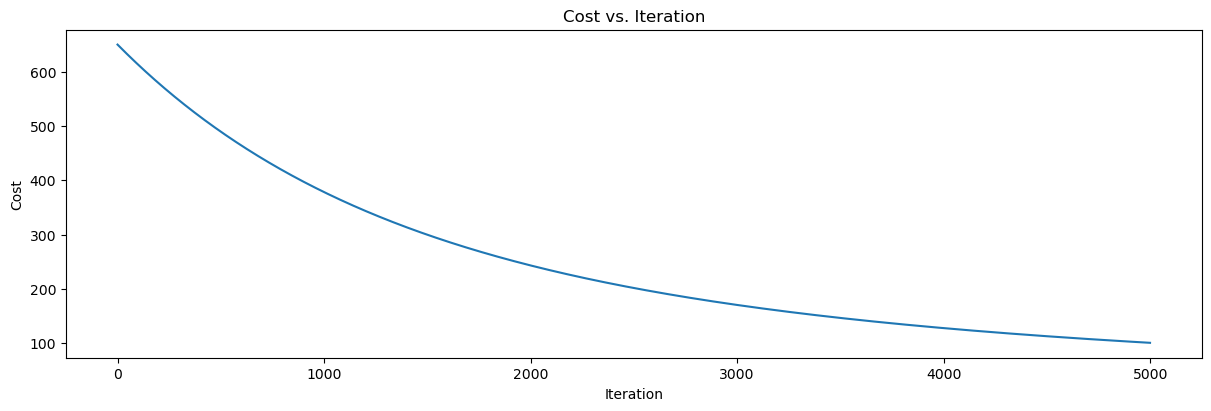

In [10]:
# Plot cost versus iteration
fig, ax1 = plt.subplots(1, 1, constrained_layout=True, figsize=(12,4))
ax1.plot(range(iterations), J_hist)
ax1.set_title("Cost vs. Iteration")
ax1.set_ylabel('Cost')
ax1.set_xlabel('Iteration')
plt.show()


In [11]:
# # Train predictions
# tmp_f_wb_train = np.dot(X_train, w_final) + b_final
# plt.scatter(X_train, tmp_f_wb_train, c='r', label='Our train Prediction')
# plt.scatter(X_train, y_train, marker='x', c='r', label='Actual train Values')

# # Test predictions
# tmp_f_wb_test = np.dot(X_test, w_final) + b_final
# plt.scatter(X_test, tmp_f_wb_test, c='g', label='Our test Prediction')
# plt.scatter(X_test, y_test, marker='x', c='g', label='Actual test Values')

# # Set the title
# plt.title("Model Predictions vs. Actual Values")

# # Set the y-axis label
# plt.ylabel("Target (T)")

# # Set the x-axis label
# plt.xlabel("Features")

# plt.legend()
# plt.show()